<a href="https://colab.research.google.com/github/suozzi-matt/housingMktDataViz/blob/main/Homework_Web_Scraper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 3: Python and Web Scraper

Matt Suozzi (mds5dd)

In [1]:
import csv
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
# College Basketball ranking and statistics web pages
url = 'https://kenpom.com/'

In [3]:
# Web scraper for kenpom.com (url)
page = requests.get(url)
html = page.content
soup = BeautifulSoup(html)
table = soup.find('tbody') # find just the table body
#print(table.prettify()) # don't need to print the table with tags due to length
list_of_rows = []
for row in table.findAll('tr'): # table rows have the <tr> tag
  list_of_cells = []
  for cell in row.findAll('td'): # table cells have the <td> tag
    text = cell.text.replace('&nbsp;','')
    list_of_cells.append(text)
  list_of_rows.append(list_of_cells)
print(list_of_rows)

[['1', 'Gonzaga 1', 'WCC', '26-0', '+38.05', '126.8', '1', '88.8', '10', '74.8', '4', '+.018', '136', '+7.82', '94', '105.7', '100', '97.9', '96', '+5.99', '106'], ['2', 'Michigan 1', 'B10', '20-4', '+32.22', '120.1', '6', '87.9', '7', '66.8', '260', '+.026', '115', '+16.87', '14', '111.3', '12', '94.5', '18', '+2.99', '158'], ['3', 'Illinois 1', 'B10', '23-6', '+32.04', '119.7', '7', '87.6', '5', '70.7', '80', '+.030', '110', '+18.88', '3', '112.6', '2', '93.7', '9', '+9.95', '57'], ['4', 'Baylor 1', 'B12', '22-2', '+30.93', '124.0', '3', '93.0', '44', '68.4', '179', '+.050', '69', '+9.57', '78', '106.4', '90', '96.9', '66', '-4.18', '270'], ['5', 'Iowa 2', 'B10', '21-8', '+30.33', '124.2', '2', '93.9', '50', '70.0', '99', '-.028', '240', '+16.91', '13', '110.3', '19', '93.4', '6', '-5.43', '286'], ['6', 'Houston 2', 'Amer', '24-3', '+30.25', '119.6', '8', '89.4', '16', '64.9', '327', '-.009', '201', '+6.57', '106', '103.7', '151', '97.1', '74', '+1.63', '186'], ['7', 'Ohio St. 2', 'B

In [4]:
# Write the csv file for kenpom.com
with open("kenpom_table.csv", "w", newline='') as f:
  writer = csv.writer(f)
  # Add column names to the file
  writer.writerow(["Rank", "Team", "Conference", "W-L", "AdjEM", "AdjO", "AdjO Rank", "AdjD", "AdjD Rank", "AdjT", "AdjT Rank", "Luck", "Luck Rank", "SOS AdjEM", "rank", "SOS OppO", "rank", "SOS OppD", "rank", "NCSOS AdjEM","rank"]) # add tourney seed
  # Add data to the file
  writer.writerows(list_of_rows)

In [34]:
# check output
'''
with open('kenpom_table.csv', newline='', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
      print(row)
'''

"\nwith open('kenpom_table.csv', newline='', encoding='utf-8') as f:\n    reader = csv.reader(f)\n    for row in reader:\n      print(row)\n"

In [43]:
# Read in data as pandas dataframe
data = pd.read_csv("kenpom_table.csv")
data["Wins"] = data["W-L"].str.split("-").str[0] # extract wins from W-L column
data["Seed"] = data["Team"].str.split(" ").str[-1] # teams not in the tournament will have not have an integer in data["Seed"]
data = data.convert_dtypes()
data["Wins"] = pd.to_numeric(data["Wins"], downcast="integer") # convert to integer to perform calculations
data["Date Time"] = dt.datetime.now() # Add date time column to check if stats are current
print(data.dtypes)
data.head(15)

Rank                    Int64
Team                   string
Conference             string
W-L                    string
AdjEM                 float64
AdjO                  float64
AdjO Rank               Int64
AdjD                  float64
AdjD Rank               Int64
AdjT                  float64
AdjT Rank               Int64
Luck                  float64
Luck Rank               Int64
SOS AdjEM             float64
rank                    Int64
SOS OppO              float64
rank.1                  Int64
SOS OppD              float64
rank.2                  Int64
NCSOS AdjEM           float64
rank.3                  Int64
Wins                     int8
Seed                   string
Date Time      datetime64[ns]
dtype: object


,Rank,Team,Conference,W-L,AdjEM,AdjO,AdjO Rank,AdjD,AdjD Rank,AdjT,AdjT Rank,Luck,Luck Rank,SOS AdjEM,rank,SOS OppO,rank.1,SOS OppD,rank.2,NCSOS AdjEM,rank.3,Wins,Seed,Date Time
0,1,Gonzaga 1,WCC,26-0,38.05,126.8,1,88.8,10,74.8,4,0.018,136,7.82,94,105.7,100,97.9,96,5.99,106,26,1,2021-03-15 00:44:46.999500
1,2,Michigan 1,B10,20-4,32.22,120.1,6,87.9,7,66.8,260,0.026,115,16.87,14,111.3,12,94.5,18,2.99,158,20,1,2021-03-15 00:44:46.999500
2,3,Illinois 1,B10,23-6,32.04,119.7,7,87.6,5,70.7,80,0.030,110,18.88,3,112.6,2,93.7,9,9.95,57,23,1,2021-03-15 00:44:46.999500
3,4,Baylor 1,B12,22-2,30.93,124.0,3,93.0,44,68.4,179,0.050,69,9.57,78,106.4,90,96.9,66,-4.18,270,22,1,2021-03-15 00:44:46.999500
4,5,Iowa 2,B10,21-8,30.33,124.2,2,93.9,50,70.0,99,-0.028,240,16.91,13,110.3,19,93.4,6,-5.43,286,21,2,2021-03-15 00:44:46.999500
5,6,Houston 2,Amer,24-3,30.25,119.6,8,89.4,16,64.9,327,-0.009,201,6.57,106,103.7,151,97.1,74,1.63,186,24,2,2021-03-15 00:44:46.999500
6,7,Ohio St. 2,B10,21-9,26.85,123.0,4,96.1,79,67.1,247,0.003,163,18.78,5,111.7,8,92.9,3,2.86,162,21,2,2021-03-15 00:44:46.999500
7,8,Alabama 2,SEC,24-6,26.42,112.4,34,86.0,2,73.9,9,0.031,107,14.20,27,109.7,28,95.5,32,8.88,70,24,2,2021-03-15 00:44:46.999500
8,9,Loyola Chicago 8,MVC,24-4,25.18,111.1,49,85.9,1,64.2,342,-0.020,226,4.11,134,104.3,136,100.2,136,4.70,129,24,8,2021-03-15 00:44:46.999500
9,10,Wisconsin 9,B10,17-12,24.08,113.2,32,89.1,13,64.9,326,-0.049,283,18.06,9,111.7,7,93.7,8,1.22,194,17,9,2021-03-15 00:44:46.999500


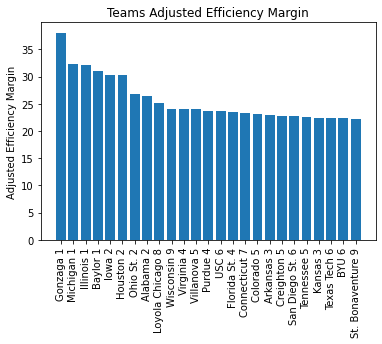

In [41]:
# Plot of Adj Efficiency Margin
#filter: rank<=25
rank_filter = 25 
data_filtered = data.iloc[0:rank_filter]

teams_top = list(data_filtered["Team"])
y_pos = np.arange(len(teams_top))
adj_margin = list(data_filtered["AdjEM"])

plt.bar(y_pos, adj_margin)
plt.xticks(y_pos, teams_top)
plt.xticks(rotation=90)
plt.ylabel("Adjusted Efficiency Margin")
plt.title("Teams Adjusted Efficiency Margin")

plt.show()

KenPom rankings are based on Adjusted Effiency Margin, which is the difference between Adjusted Offense and Adjusted Defense.

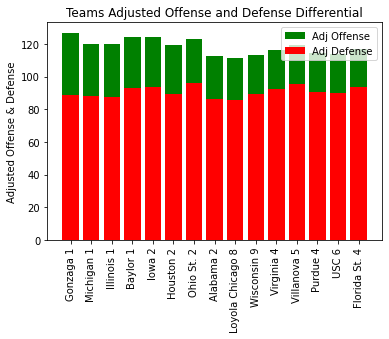

In [25]:
# Stacked plot of Adj Offense - Adj Defense
#filter: rank<=15
rank_filter = 15 
data_filtered = data.iloc[0:rank_filter]
teams_top = list(data_filtered["Team"])
y_pos = np.arange(len(teams_top))

adj_off = list(data_filtered["AdjO"])
adj_def = list(data_filtered["AdjD"])

plt.bar(y_pos, adj_off, label= "Adj Offense", color = "green")
plt.bar(y_pos, adj_def, label= "Adj Defense", color = "red")
plt.xticks(y_pos, teams_top)
plt.xticks(rotation=90)
plt.ylabel("Adjusted Offense & Defense")
plt.title("Teams Adjusted Offense and Defense Differential")
plt.legend(loc="best")

plt.show()

The portion of the above graph that is green is equivalent to the Adjusted Efficiency Margin.

In [26]:
# create a list of the teams
teams = list(data["Team"])
#teams_lower = list(map(str.lower, teams))
print(teams)

# create a set of the conferences (set so only one entry per conference)
conferences = sorted(set(data["Conference"])) 
#conf_lower = list(map(str.lower, conferences))
print(conferences)

# create an empty dataframe to track team stats over time
#team_ts = pd.DataFrame({"Rank":[], "Team":[], "Conference":[], "W-L":[], "Wins":[], "AdjEM":[], "AdjO":[], "AdjO Rank":[], "AdjD":[], "AdjD Rank":[], "Date Time":[]})
#virginia_ts = pd.DataFrame({"Rank":[], "Team":[], "Conference":[], "W-L":[], "Wins":[], "AdjEM":[], "AdjO":[], "AdjO Rank":[], "AdjD":[], "AdjD Rank":[], "Date Time":[]})

['Gonzaga 1', 'Michigan 1', 'Illinois 1', 'Baylor 1', 'Iowa 2', 'Houston 2', 'Ohio St. 2', 'Alabama 2', 'Loyola Chicago 8', 'Wisconsin 9', 'Virginia 4', 'Villanova 5', 'Purdue 4', 'USC 6', 'Florida St. 4', 'Connecticut 7', 'Colorado 5', 'Arkansas 3', 'Creighton 5', 'San Diego St. 6', 'Tennessee 5', 'Kansas 3', 'Texas Tech 6', 'BYU 6', 'St. Bonaventure 9', 'Texas 3', 'West Virginia 3', 'North Carolina 8', 'LSU 8', 'Oklahoma St. 4', 'Maryland 10', 'Georgia Tech 9', 'Duke', 'Rutgers 10', 'Penn St.', 'Oregon 7', 'Florida 7', 'Memphis', 'Oklahoma 8', 'Utah St. 11', 'Syracuse 11', 'Clemson 7', 'Arizona', 'UCLA 11', 'VCU 10', 'Indiana', 'Saint Louis', 'Mississippi', 'Kentucky', 'Virginia Tech 10', 'Missouri 9', 'Seton Hall', 'Drake 11', 'Louisville', 'Georgetown 12', 'Michigan St. 11', 'Davidson', 'Minnesota', 'SMU', 'Boise St.', 'Xavier', 'Toledo', 'Colorado St.', 'Auburn', 'Richmond', 'Wright St.', "St. John's", 'Buffalo', 'UC Santa Barbara 12', 'Northwestern', 'North Texas 13', 'Utah', 'N.

In [27]:
# Find Virginia and stats
team = "Virginia 4" # include seed
team_stats = data[data["Team"]==team]
print(team_stats.iloc[:,:9])

    Rank        Team Conference   W-L  AdjEM   AdjO  AdjO Rank  AdjD  AdjD Rank
10    11  Virginia 4        ACC  18-6  24.08  116.3         12  92.3         33


In [32]:
# Find any team by user input
new_team = input("Lookup a new team: ") # raise if input not string (i.e. integer, then look up rank)
if new_team in teams:
  team_stats = data[data["Team"]==new_team]
  print(team_stats)
else: 
  print("Team not found!")
  new_team = input("Please enter an NCAA DI team (with proper formattingn and seed): ") # raise if input not string (i.e. integer, then look up rank)
  team_stats = data[data["Team"]==new_team]
  print(team_stats)

Lookup a new team: Duke
    Rank  Team Conference    W-L  ...  rank.3  Wins  Seed                  Date Time
32    33  Duke        ACC  13-11  ...     120    13  Duke 2021-03-15 00:34:31.781138

[1 rows x 24 columns]


In [28]:
# Find all ACC teams with ranking and W-L
conference = "ACC"
acc_teams = data[data["Conference"]==conference]
print(acc_teams.iloc[:,0:4])

print("\n")

# sum total wins
acc_wins = sum(acc_teams["Wins"])
print("Total conference wins: " + str(acc_wins))

     Rank              Team Conference    W-L
10     11        Virginia 4        ACC   18-6
14     15     Florida St. 4        ACC   16-6
27     28  North Carolina 8        ACC  18-10
31     32    Georgia Tech 9        ACC   17-8
32     33              Duke        ACC  13-11
40     41       Syracuse 11        ACC   16-9
41     42         Clemson 7        ACC   16-7
49     50  Virginia Tech 10        ACC   15-6
53     54        Louisville        ACC   13-7
72     73        N.C. State        ACC  13-10
80     81        Notre Dame        ACC  11-15
88     89        Pittsburgh        ACC  10-12
131   132          Miami FL        ACC  10-17
142   143    Boston College        ACC   4-16
169   170       Wake Forest        ACC   6-16


Total conference wins: 196


In [44]:
# Group by conference: teams in top 50, total wins
#filter: rank<=50
rank_filter = 50 
# can input new filter
rank_filter = int(input("Filter the top teams (10-300): "))
data_filtered = data.iloc[0:rank_filter]

#total wins for each conference
conf_total = pd.DataFrame(data.groupby('Conference')["Wins"].sum())
conf_total["Team_Count"] = data.groupby('Conference')["Team"].count()

#groupby["Conference"] to sum("Wins")
conf_stats = pd.DataFrame(data_filtered.groupby('Conference')["Wins"].sum())

#count("Team")
conf_stats["Team_Count"] = data_filtered.groupby('Conference')["Team"].count()

# Average wins per team in each conference
conf_stats["Avg_Wins_per_Team"] = conf_stats["Wins"]/conf_stats["Team_Count"]

# What proportion of the conference is highly ranked?
conf_stats["Team_Representation"] = conf_stats["Team_Count"]/conf_total["Team_Count"]
#conf_stats["Win_Representation"] = conf_stats["Wins"]/conf_total["Wins"]

conf_stats

Filter the top teams (10-300): 50


,Wins,Team_Count,Avg_Wins_per_Team,Team_Representation
Conference,,,,
A10,49.0,3,16.333333,0.214286
ACC,129.0,8,16.125000,0.533333
Amer,40.0,2,20.000000,0.181818
B10,174.0,10,17.400000,0.714286
B12,131.0,7,18.714286,0.700000
BE,51.0,3,17.000000,0.272727
MVC,24.0,1,24.000000,0.100000
MWC,43.0,2,21.500000,0.181818
P12,98.0,5,19.600000,0.416667


Text(0.5, 1.0, 'Number of Conferences with highly ranked teams')

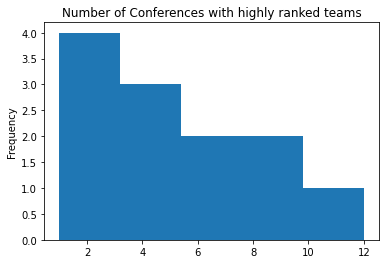

In [30]:
# Create a histogram of highly ranked teams from each conference
conf_stats["Team_Count"].plot.hist(bins=5)
plt.title("Number of Conferences with highly ranked teams")

There are a few "Power" conferences with high representation, and many conferences with low representation, but have standout performers like MVC, MWC, and WCC that have teams with over 20 wins.